In [ ]:
! pip install -q kaggle

In [ ]:
 from google.colab import files 
 files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"mohamedbenmaiza","key":"7637731167f99e3dab4d2e484909135d"}'}

In [ ]:
 ! mkdir ~/.kaggle 

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d imakash3011/customer-personality-analysis

customer-personality-analysis.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip /content/customer-personality-analysis.zip

Archive:  /content/customer-personality-analysis.zip
replace marketing_campaign.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv("/content/marketing_campaign.csv",sep="\t")

In [ ]:
data.shape


(2240, 29)

In [ ]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
data['childreen']=data["Kidhome"]+data["Teenhome"]
data.drop("Kidhome",inplace=True,axis=1)
data.drop("Teenhome",inplace=True,axis=1)


In [ ]:
ID=data["ID"]
data=data.drop("ID",axis=1,)

In [ ]:
data["Age"]=data['Year_Birth'].apply(lambda x: 2021-x)
data=data.drop('Year_Birth',axis=1)

In [ ]:
data["Dt_Customer"]=pd.to_datetime(data['Dt_Customer'])

In [ ]:
from datetime import date
data['Dt_Customer_days']=pd.to_datetime(date.today())-data["Dt_Customer"]
data=data.drop("Dt_Customer",axis=1)
data['Dt_Customer_days']=data['Dt_Customer_days'].apply(lambda x: x.value/10**9/3600/24)

In [ ]:
data['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [ ]:
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

In [ ]:
data['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

In [ ]:
data["Living_With"]=data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})
data.drop("Marital_Status",inplace=True,axis=1)

In [ ]:
data['TotalSpendings'] =  data.MntWines + data.MntFruits + data.MntMeatProducts + data.MntFishProducts + data.MntSweetProducts + data.MntGoldProds

In [ ]:
data.drop(["MntWines", "MntFruits", "MntMeatProducts" ,"MntFishProducts","MntSweetProducts", "MntGoldProds"],inplace=True,axis=1)

In [ ]:
# remove outliers
print(data["Income"].describe())
print(data.shape)
data=data[data["Income"]<666666]
print(data.shape)

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64
(2240, 22)
(2215, 22)


In [ ]:
data.isna().any(axis=1).sum()

0

In [ ]:
data=data[~data.isna().any(axis=1)]

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
data.head()

,Education,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,childreen,Age,Dt_Customer_days,Living_With,TotalSpendings
0,Graduate,58138.0,58,3,8,10,4,7,0,0,0,0,0,0,3,11,1,0,64,3523.0,Alone,1617
1,Graduate,46344.0,38,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2,67,2677.0,Alone,27
2,Graduate,71613.0,26,1,8,2,10,4,0,0,0,0,0,0,3,11,0,0,56,3024.0,Partner,776
3,Graduate,26646.0,26,2,2,0,4,6,0,0,0,0,0,0,3,11,0,1,37,2617.0,Partner,53
4,Postgraduate,58293.0,94,5,5,3,6,5,0,0,0,0,0,0,3,11,0,1,40,2873.0,Partner,422


(array([187., 501., 678., 533., 298.,  15.,   0.,   0.,   0.,   3.]),
 array([ 25. ,  35.3,  45.6,  55.9,  66.2,  76.5,  86.8,  97.1, 107.4,
        117.7, 128. ]),
 <a list of 10 Patch objects>)

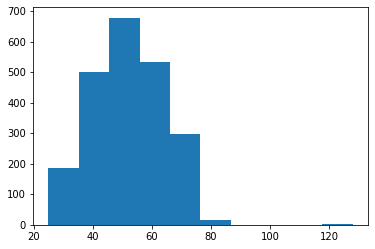

In [ ]:
import matplotlib.pyplot as plt
plt.hist(data['Age'])

In [ ]:
data=data[data['Age']<=90]

(array([ 632.,    0.,    0., 1114.,    0.,    0.,  416.,    0.,    0.,
          50.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

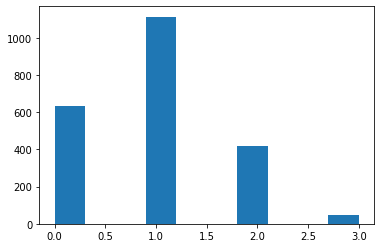

In [ ]:
import matplotlib.pyplot as plt
plt.hist(data['childreen'])

In [ ]:
old=data.copy()

In [ ]:
data=pd.get_dummies(data)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Income                   2212 non-null   float64
 1   Recency                  2212 non-null   int64  
 2   NumDealsPurchases        2212 non-null   int64  
 3   NumWebPurchases          2212 non-null   int64  
 4   NumCatalogPurchases      2212 non-null   int64  
 5   NumStorePurchases        2212 non-null   int64  
 6   NumWebVisitsMonth        2212 non-null   int64  
 7   AcceptedCmp3             2212 non-null   int64  
 8   AcceptedCmp4             2212 non-null   int64  
 9   AcceptedCmp5             2212 non-null   int64  
 10  AcceptedCmp1             2212 non-null   int64  
 11  AcceptedCmp2             2212 non-null   int64  
 12  Complain                 2212 non-null   int64  
 13  Z_CostContact            2212 non-null   int64  
 14  Z_Revenue               

In [ ]:
def isBinary(col):
  if 1 in col.value_counts().index and 0 in col.value_counts().index and col.value_counts().index.shape[0]==2:
    return True
  return False

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
non_binary=[]
for c in data.columns:
  if not isBinary(data[c]):
    non_binary.append(c)

In [ ]:
scaler=MinMaxScaler()
data[non_binary]=scaler.fit_transform(data[non_binary])

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca=PCA()
transformed_data=pca.fit_transform(data)
pca.explained_variance_ratio_.sum()

1.0

In [ ]:
n=0
sum=0
for i in pca.explained_variance_ratio_:
  sum+=i
  n+=1
  if sum>0.95:
    break
n

13

In [ ]:
pca=PCA(n_components=n)
transformed_data=pca.fit_transform(data)
pca.explained_variance_ratio_.sum()

0.963841687471538

# KMEANS


## with PCA

In [ ]:
from sklearn.metrics import silhouette_score
import time
sil = []
kmax = 40
start=time.time()
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(transformed_data)
  labels = kmeans.labels_
  sil.append({"score":silhouette_score(transformed_data, labels, metric = 'euclidean'),"k":k})
end=time.time()
print('Time : ',end-start)

Time :  45.6088433265686


In [ ]:
sil.sort(key=lambda x:x["score"],reverse=True)


In [ ]:
sil[0]

{'k': 7, 'score': 0.39447938010780886}

In [ ]:
kmeans = KMeans(n_clusters = sil[0]["k"]).fit(data)
labels = kmeans.labels_

In [ ]:
pd.Series(labels).value_counts()

0    669
1    516
3    386
4    288
2    168
5    103
6     82
dtype: int64

In [ ]:
pca=PCA(n_components=3)
transformed_data=pca.fit_transform(data)
pca.explained_variance_ratio_.sum()

0.592356345572184

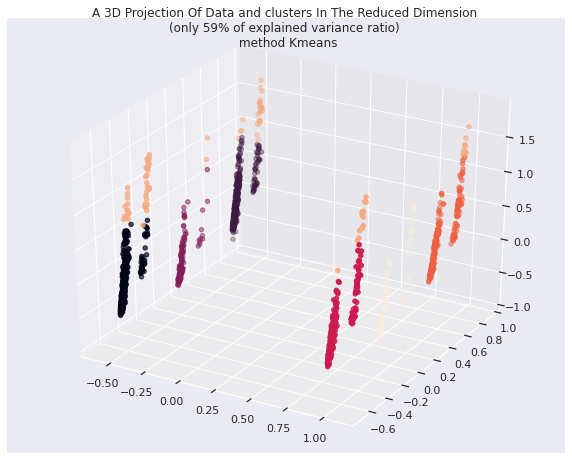

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(transformed_data[:,0],transformed_data[:,1],transformed_data[:,2], c=labels, marker="o" )
ax.set_title("A 3D Projection Of Data and clusters In The Reduced Dimension \n(only 59% of explained variance ratio) \n method Kmeans")
plt.show()

## without PCA

In [ ]:
from sklearn.metrics import silhouette_score
import time
sil = []
kmax = 40
start=time.time()
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(data)
  labels = kmeans.labels_
  sil.append({"score":silhouette_score(data, labels, metric = 'euclidean'),"k":k})
end=time.time()
print('Time : ',end-start)

Time :  48.74438166618347


In [ ]:
sil.sort(key=lambda x:x["score"],reverse=True)
sil[0]

{'k': 7, 'score': 0.3737158976723335}

In [ ]:
kmeans = KMeans(n_clusters = sil[0]["k"]).fit(data)
labels = kmeans.labels_

In [ ]:
pd.Series(labels).value_counts()

2    666
0    516
1    386
3    240
6    214
5     95
4     95
dtype: int64

## Visualization
with pca


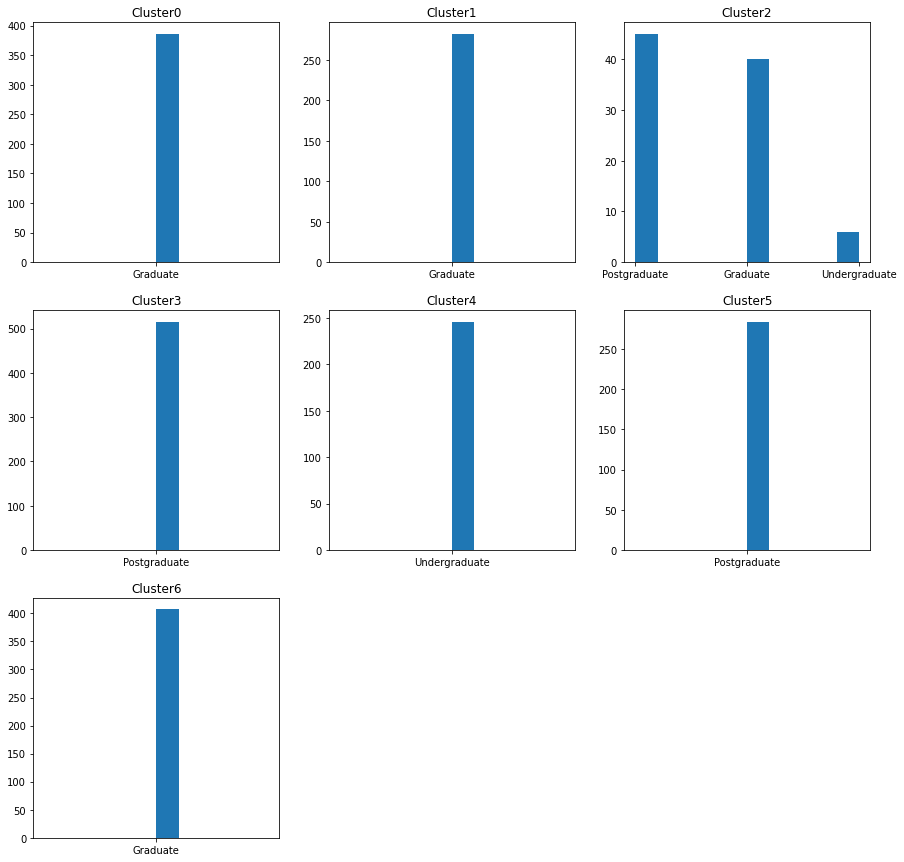

In [ ]:
fig = plt.figure(figsize=(15,15))
for i in range(len(set(labels))):
  cluster=old[labels==i]
  plt.subplot(3, 3, i+1)
  plt.hist(cluster['Education'])
  plt.title("Cluster"+str(i))


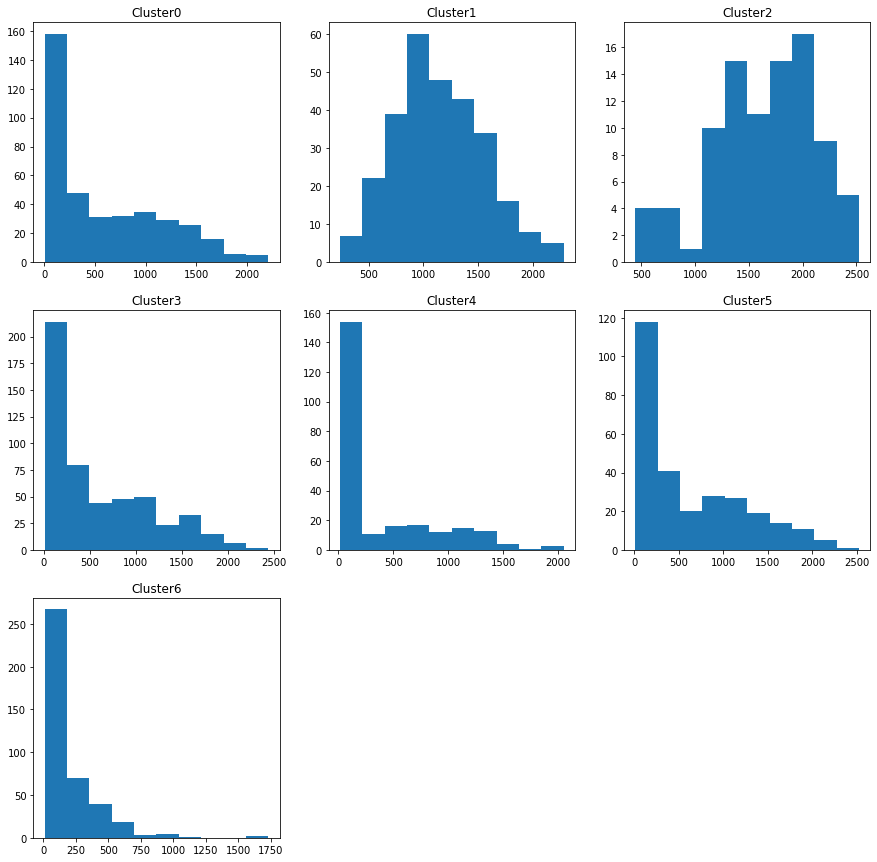

In [ ]:
fig = plt.figure(figsize=(15,15))
for i in range(len(set(labels))):
  cluster=old[labels==i]
  plt.subplot(3, 3, i+1)
  plt.hist(cluster['TotalSpendings'])
  plt.title("Cluster"+str(i))


In [ ]:
old.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2212 non-null   object 
 1   Income               2212 non-null   float64
 2   Recency              2212 non-null   int64  
 3   NumDealsPurchases    2212 non-null   int64  
 4   NumWebPurchases      2212 non-null   int64  
 5   NumCatalogPurchases  2212 non-null   int64  
 6   NumStorePurchases    2212 non-null   int64  
 7   NumWebVisitsMonth    2212 non-null   int64  
 8   AcceptedCmp3         2212 non-null   int64  
 9   AcceptedCmp4         2212 non-null   int64  
 10  AcceptedCmp5         2212 non-null   int64  
 11  AcceptedCmp1         2212 non-null   int64  
 12  AcceptedCmp2         2212 non-null   int64  
 13  Complain             2212 non-null   int64  
 14  Z_CostContact        2212 non-null   int64  
 15  Z_Revenue            2212 non-null   i

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set() 

In [ ]:
fig, axes = plt.subplots(22, 7, figsize=(100, 100))
plt.subplots_adjust( wspace=0.5, hspace=1)
for i,col in enumerate(old.columns):
  for j in range(len(set(labels))):
    cluster=old[labels==j]
    p=sns.histplot(ax=axes[i, j], data=cluster, x=col)
    p.set_title("cluster "+str(j))
fig.tight_layout()
plt.show()



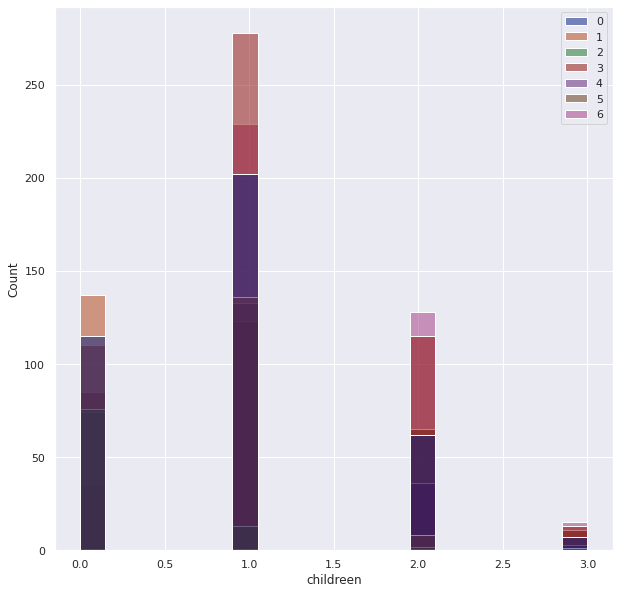

In [ ]:
 plt.figure(figsize=(10, 10))
cluster=old
palette = sns.color_palette("dark",sil[0]["k"])
p=sns.histplot(data=cluster, x="childreen",hue=labels,palette=palette)
fig.tight_layout()
plt.show()

# DBSCAN


## with PCA

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
import numpy as np

In [ ]:
import time
sil = []
kmax = 40
start=time.time()
max_ep=100
max_min_pt=20
for ep  in range(1,max_ep):
  for m in range(2,max_min_pt):
    try:
      dbscan = DBSCAN(eps=ep/max_ep,min_samples=m).fit(transformed_data)
      labels = dbscan.labels_
      sil.append({"score":silhouette_score(transformed_data, labels, metric = 'euclidean'),"ep":ep,"m":m})
    except :
      pass
end=time.time()
print('Time : ',end-start)

Time :  304.8648569583893


In [ ]:
sil.sort(key=lambda x:x["score"],reverse=True)


In [ ]:
sil[0]

{'ep': 59, 'm': 2, 'score': 0.6012382361985058}

In [ ]:
dbscan = DBSCAN(eps=sil[0]["ep"]/max_ep,min_samples=sil[0]["m"]).fit(data)
labels = dbscan.labels_

In [ ]:
res=pd.Series(labels).value_counts().sort_values(ascending=False)
res=res[res>50]
res=res.drop(axis=0,index=-1)
res

2    518
3    393
1    280
6    183
5    131
8     60
dtype: int64

## without PCA

In [ ]:
import time
sil = []
kmax = 40
start=time.time()
max_ep=100
max_min_pt=20
for ep  in range(1,max_ep):
  for m in range(2,max_min_pt):
    try:
      dbscan = DBSCAN(eps=ep/max_ep,min_samples=m).fit(data)
      labels = dbscan.labels_
      sil.append({"score":silhouette_score(data, labels, metric = 'euclidean'),"ep":ep,"m":m})
    except :
      pass
end=time.time()
print('Time : ',end-start)

Time :  387.66057538986206


In [ ]:
sil.sort(key=lambda x:x["score"],reverse=True)
sil[0]

{'ep': 98, 'm': 2, 'score': 0.3218838189381646}

In [ ]:
dbscan = DBSCAN(eps=sil[0]["ep"]/max_ep,min_samples=sil[0]["m"]).fit(data)
labels = dbscan.labels_

In [ ]:
res=pd.Series(labels).value_counts().sort_values(ascending=False)
res=res[res>50]
res=res.drop(axis=0,index=-1)
res

2     520
3     399
1     284
7     185
6     133
10     65
dtype: int64